# BigMart Sales Prediction

## 1. Read data

In [272]:
import pandas as pd
train = pd.read_csv('/Users/zhichaoweng/Desktop/Train.csv')
train.head()
test = pd.read_csv('/Users/zhichaoweng/Desktop/Test.csv')
train.head()

import matplotlib.pyplot as plt
%matplotlib inline

In [273]:
test.head()
import numpy as np

## 2. Recombine data for better analysis

In [274]:
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index = True)

/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


In [275]:
data[:10]

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.300,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.920,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.500,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.200,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.930,1987,OUT013,Tier 3,High,Supermarket Type1,train
5,Regular,FDP36,51.4008,556.6088,Baking Goods,0.000000,10.395,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
6,Regular,FDO10,57.6588,343.5528,Snack Foods,0.012741,13.650,1987,OUT013,Tier 3,High,Supermarket Type1,train
7,Low Fat,FDP10,107.7622,4022.7636,Snack Foods,0.127470,NaN,1985,OUT027,Tier 3,Medium,Supermarket Type3,train
8,Regular,FDH17,96.9726,1076.5986,Frozen Foods,0.016687,16.200,2002,OUT045,Tier 2,NaN,Supermarket Type1,train
9,Regular,FDU28,187.8214,4710.5350,Frozen Foods,0.094450,19.200,2007,OUT017,Tier 2,NaN,Supermarket Type1,train


To check the null values in the dataset:

In [276]:
data.apply(lambda x: sum(x.isna())) #use lambda to check the NaN values in each column in the dataset.

Item_Fat_Content                0
Item_Identifier                 0
Item_MRP                        0
Item_Outlet_Sales            5681
Item_Type                       0
Item_Visibility                 0
Item_Weight                  2439
Outlet_Establishment_Year       0
Outlet_Identifier               0
Outlet_Location_Type            0
Outlet_Size                  4016
Outlet_Type                     0
source                          0
dtype: int64

There are three columns that have null values in: Item_Outlet_Sales, Item_Weight and Outlet_Size. 

For Item_Outlet_Sales: as this is the target values and are missing for all test dataset. No need to worry about this first.

Have to consider the Item_Weight and Outlet_Size these two features.

As we can see, there are two types of variables in the dataset: numerical and categorical.

### a. numerical dataset check:

In [277]:
data.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


From the above description:

a. The mean value of "Item_Visibility" is around 0, which doesn't make any sense for the stuffs sold in the store.


b. For the feature "Outlet_Establishment_Year", the value varies from 1985 to 2009. This would be easier to view if we turn this into how old the company is.

### b. categorical data check:

In [278]:
data.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

This is to check that the numbers of different types in different categorical features:

We can see that there are 1559 kinds of stuffs and 10 different stores

Let's check some categorical data further.

In [279]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
dtype: object

In [280]:
Categorical = [x for x in data.dtypes.index if data.dtypes[x] == 'object']  #Select all the categorical features

Categorical = [x for x in Categorical if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]  #exclude the feature "Item_Identifier" and "Outlet_Identifier"

for x in Categorical:
    print("Category in " + x)    
    print(data[x].value_counts())
    print(" ")

Category in Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
 
Category in Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
 
Category in Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
 
Category in Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
 
Category in Outlet_Type
Supermarket Type1    9294
Grocery Store        1805
Supermarket Type3 

Observations: 

1. In feature "Item_Fat_Content", "low fat" has three equal labels: "Low Fat", "LF" and "low fat"; "regular" has two equal labels: "Regular" and "reg"
2. In feature "Item_Type", the min and max differentiate a lot. So some of the items with low numbers should be combined
3. In feature "Outlet_Type, "Type 2" and "Type 3" have very simialr numbers, so they could be merged together.

## missing data imputation

For "Item_Weight" numerical data, we fill the average value in the missing values

In [281]:
ave_weight = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier',aggfunc = np.mean) #calculate the average weight for each unique item identifier
nanweight = data['Item_Weight'].isna() #print the boolean values of the NaN in Item_Weight for later selection
data.loc[nanweight,'Item_Weight'] = data.loc[nanweight, 'Item_Identifier'].apply(lambda x: ave_weight.loc[x]) #replace the NaN (by selection using the true values in nanweight) values with ave_weight


In [282]:
data['Item_Weight'].isna().any() # after the replacement, there is no NaN data in "Item_Weight" feature

False

For "Outlet_size" categorical data, we fill the mode value in the missing values

In [283]:
from scipy.stats import mode
mode_size = data.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()))
nansize = data['Outlet_Size'].isna()
data.loc[nansize, 'Outlet_Size'] = data.loc[nansize, 'Outlet_Type'].apply(lambda x: mode_size[x])

In [284]:
data['Outlet_Size'].isna().any() # after the imputation, there is no NaN values in "Outlet_Size" feature

False

## Feature engineering

a. for Supermarket Type

In [285]:
# to check if there's a need to combine Supermarket Type2 and Supermarket Type3 together by checking the average values
data.pivot_table(values = 'Item_Outlet_Sales', columns = 'Outlet_Type')


Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Outlet_Sales,339.8285,2316.181148,1995.498739,3694.038558


It turns out that the average values between Supermarket Type2 and Type3 differs a lot. So there's no need to combine Type2 and Type3

b. for Item_visibility. Previously we found that the mean value of zero in visibility makes no sense. Hence, we gonna treat this like missing data imputation case to replace with mean values of the visibility.

In [286]:
ave_vis = data.pivot_table(values = 'Item_Visibility', index = 'Item_Identifier', aggfunc = np.mean) #find the mean values of visibility of each item
ave_vis.head()
zero_vis = (data['Item_Visibility'] == 0) #find the label for visibility which equals zero
zero_vis[:5]
data.loc[zero_vis, 'Item_Visibility'] = data.loc[zero_vis, 'Item_Identifier'].apply(lambda x: ave_vis.loc[x]) #zero value replacement


In [287]:
(data['Item_Visibility'] == 0).any() #check that there's no zero value in the feature "Item_Visibility" now

False

c. For Item_Visibility. It is intuitive to hypothesize that higher visibility can contribute to larger sales. It would be more straightforward to see if this is correct by calculating the ratio between each absolute visibility to the mean visibility values (to create a new feature)

In [288]:
data['VisibilityRatio'] = data.apply(lambda x: x['Item_Visibility']/ave_vis.loc[x['Item_Identifier']], axis=1)

In [289]:
data['Item_Visibility'].describe() #before the visibility data engineering

count    14204.000000
mean         0.069710
std          0.049728
min          0.003575
25%          0.031145
50%          0.057194
75%          0.096930
max          0.328391
Name: Item_Visibility, dtype: float64

In [290]:
data['VisibilityRatio'].describe() #after the visibility data engineering, now the 

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: VisibilityRatio, dtype: float64

In [291]:
data['Item_Identifier'].apply(lambda x: x[:2]).value_counts()  # By just taking first two characters out of the Item_identifier, there are only three type
#FD, NC and DR. 
#Corresponding to FooD, Non-Consumable and DRink.

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

So now we can recategorize the "Item_Type" into broader types for better analysis.

In [292]:
data['Item_Combined'] = data['Item_Identifier'].apply(lambda x: x[:2])
data['Item_Combined'] = data['Item_Combined'].map({'FD': 'Food',
                         'DR': 'Drink',
                         'NC': 'Non-Consumable'}) #replace operations
data['Item_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Combined, dtype: int64

Now we need to convert the "establishment year" feature into the age of each store

In [293]:
data['Store_Age'] = 2013 - data['Outlet_Establishment_Year']     #because the data was from the year 2013
data['Store_Age'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Store_Age, dtype: float64

Now we need to fix the typos in "Item_Fat_Content" feature

In [294]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [295]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat',
                             'reg': 'Regular',
                             'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [296]:
data[['Item_Combined','Item_Fat_Content']][:10]

,Item_Combined,Item_Fat_Content
0,Food,Low Fat
1,Drink,Regular
2,Food,Low Fat
3,Food,Regular
4,Non-Consumable,Low Fat
5,Food,Regular
6,Food,Regular
7,Food,Low Fat
8,Food,Regular
9,Food,Regular


Note that there are some "Non-Consumable" for some "Low Fat" features, which is mixing with those "Low Fat" features that are "Food". So we need to modify those "Non-Consumable" "Low Fat" to "Non_Edible".

In [297]:
data.loc[data['Item_Combined']=='Non-Consumable','Item_Fat_Content'] = 'Non-Edible' #convert those "Non-Consumable" "Low Fat" into "Non-Edible" "Low Fat"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [298]:
data['Outlet_Identifier'].value_counts()

OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

As seen from above, there are 10 outlet identifiers in total. We gonna transform those categorical variables into numerical code first

In [299]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
data.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,VisibilityRatio,Item_Combined,Store_Age,Outlet
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.931078,Food,14,9
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train,0.933420,Drink,4,3
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train,0.960069,Food,14,9
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.017834,19.20,1998,OUT010,Tier 3,Small,Grocery Store,train,1.000000,Food,15,0
4,Non-Edible,NCD19,53.8614,994.7052,Household,0.009780,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train,1.000000,Non-Consumable,26,1


In [300]:
data.dtypes

Item_Fat_Content              object
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type          object
Outlet_Size                   object
Outlet_Type                   object
source                        object
VisibilityRatio              float64
Item_Combined                 object
Store_Age                      int64
Outlet                         int64
dtype: object

This is to transform all the useful categorical variables into numerical codings in order for the one-hot encoding later

In [301]:
var = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type', 'Item_Combined', 'Outlet']
le = LabelEncoder()
for i in var:
    data[i] = le.fit_transform(data[i])

In [302]:
data.dtypes #check that all the useful categorical variables are now transformed to numerical codings 

Item_Fat_Content               int64
Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
Outlet_Location_Type           int64
Outlet_Size                    int64
Outlet_Type                    int64
source                        object
VisibilityRatio              float64
Item_Combined                  int64
Store_Age                      int64
Outlet                         int64
dtype: object

In [303]:
data = pd.get_dummies(data, columns = var)

In [304]:
data.dtypes 

Item_Identifier               object
Item_MRP                     float64
Item_Outlet_Sales            float64
Item_Type                     object
Item_Visibility              float64
Item_Weight                  float64
Outlet_Establishment_Year      int64
Outlet_Identifier             object
source                        object
VisibilityRatio              float64
Store_Age                      int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Combined_0                uint8
Item_Combined_1                uint8
Item_Combined_2                uint8
O

In [305]:
data[['Item_Combined_0','Item_Combined_1','Item_Combined_2']].head()

,Item_Combined_0,Item_Combined_1,Item_Combined_2
0,0,1,0
1,1,0,0
2,0,1,0
3,0,1,0
4,0,0,1


As can be seen from above, all the categorical variables are transformed to numerical variables and is encoded properly.

So now the data is ready for exporting

## Data exporting

In [306]:
data.drop(['Item_Type','Outlet_Establishment_Year'], axis = 1, inplace=True) #drop "Item_Type" and "Outlet_Establishement_Year" features as those are re-engineered

In [307]:
data.dtypes

Item_Identifier            object
Item_MRP                  float64
Item_Outlet_Sales         float64
Item_Visibility           float64
Item_Weight               float64
Outlet_Identifier          object
source                     object
VisibilityRatio           float64
Store_Age                   int64
Item_Fat_Content_0          uint8
Item_Fat_Content_1          uint8
Item_Fat_Content_2          uint8
Outlet_Location_Type_0      uint8
Outlet_Location_Type_1      uint8
Outlet_Location_Type_2      uint8
Outlet_Size_0               uint8
Outlet_Size_1               uint8
Outlet_Size_2               uint8
Outlet_Type_0               uint8
Outlet_Type_1               uint8
Outlet_Type_2               uint8
Outlet_Type_3               uint8
Item_Combined_0             uint8
Item_Combined_1             uint8
Item_Combined_2             uint8
Outlet_0                    uint8
Outlet_1                    uint8
Outlet_2                    uint8
Outlet_3                    uint8
Outlet_4      

In [308]:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

In [309]:
train.drop(['source'], axis = 1, inplace = True) #for training data, "Source" is not necessary

/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [310]:
test.drop(['source','Item_Outlet_Sales'], axis = 1, inplace = True) #for testing data, "Source" and "Item_Outlet_Sales" are unnecessary

/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [311]:
train.to_csv("train_modified.csv", index = False)
test.to_csv("test_modified.csv", index = False)

# Modelling

In [312]:
train = pd.read_csv('/Users/zhichaoweng/Desktop/train_modified.csv')
test = pd.read_csv('/Users/zhichaoweng/Desktop/test_modified.csv')

In [313]:
train.head()

,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Identifier,VisibilityRatio,Store_Age,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,249.8092,3735.1380,0.016047,9.30,OUT049,0.931078,14,1,0,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,48.2692,443.4228,0.019278,5.92,OUT018,0.933420,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,141.6180,2097.2700,0.016760,17.50,OUT049,0.960069,14,1,0,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,182.0950,732.3800,0.017834,19.20,OUT010,1.000000,15,0,0,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,53.8614,994.7052,0.009780,8.93,OUT013,1.000000,26,0,1,...,0,1,0,0,0,0,0,0,0,0


In [314]:
test.head()

,Item_Identifier,Item_MRP,Item_Visibility,Item_Weight,Outlet_Identifier,VisibilityRatio,Store_Age,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDW58,107.8622,0.007565,20.750,OUT049,1.029192,14,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,FDW14,87.3198,0.038428,8.300,OUT017,1.130311,6,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,NCN55,241.7538,0.099575,14.600,OUT010,1.735215,15,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,FDQ58,155.0340,0.015388,7.315,OUT017,1.291577,6,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,FDY38,234.2300,0.118599,13.600,OUT027,0.917824,28,0,0,1,...,0,0,0,0,0,1,0,0,0,0


Note that identifiers (Item_Identifier and Outlet_Identifier) can't be used as features in modelling. 

In [315]:
ID = ['Item_Identifier','Outlet_Identifier']
Target = ['Item_Outlet_Sales']
Features = [x for x in train.columns if x not in Target+ID]

In [316]:
Features

['Item_MRP',
 'Item_Visibility',
 'Item_Weight',
 'VisibilityRatio',
 'Store_Age',
 'Item_Fat_Content_0',
 'Item_Fat_Content_1',
 'Item_Fat_Content_2',
 'Outlet_Location_Type_0',
 'Outlet_Location_Type_1',
 'Outlet_Location_Type_2',
 'Outlet_Size_0',
 'Outlet_Size_1',
 'Outlet_Size_2',
 'Outlet_Type_0',
 'Outlet_Type_1',
 'Outlet_Type_2',
 'Outlet_Type_3',
 'Item_Combined_0',
 'Item_Combined_1',
 'Item_Combined_2',
 'Outlet_0',
 'Outlet_1',
 'Outlet_2',
 'Outlet_3',
 'Outlet_4',
 'Outlet_5',
 'Outlet_6',
 'Outlet_7',
 'Outlet_8',
 'Outlet_9']

define a modelfit function for batch precesses of modelling and scoring

In [355]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score

def modelfit(alg, Features, Target, train, test):
    alg.fit(train[Features], train[Target])
    train_pred = alg.predict(train[Features])
    css = cross_val_score(alg, train[Features], train[Target], cv = 20, scoring = 'neg_mean_squared_error')
    r2 = cross_val_score(alg, train[Features], train[Target], cv = 20, scoring = 'r2')
    CV_Score = np.mean(np.sqrt(np.abs(css)))
    #R2_Score = r2_score(train[Target],train_pred)
    R2_Score = np.mean(r2)
    test_pred = alg.predict(test[Features])
    print("CV Score: ", CV_Score)
    print("R2 Score: ", R2_Score)
    
    return test_pred



### 1. Linear Regression

CV Score:  1128.76497723
R2 Score:  0.559136668941


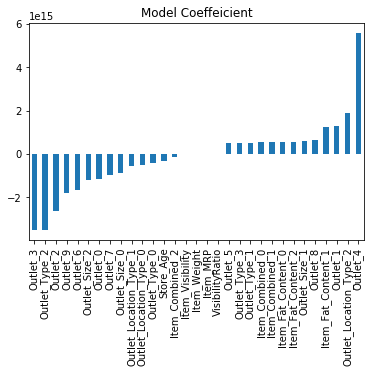

In [356]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
lreg = LinearRegression(normalize = True)

y1 = modelfit(lreg, Features, Target, train, test)
coef = pd.Series(lreg.coef_[0], Features).sort_values()
coef.plot(kind = 'bar', title = 'Model Coeffeicient')   

As seen from above coefficient graph, it shows that coefficients are all very big (~1e15), suggesting the overfitting of the model

### 2. Ridge 

In [357]:
alpha = [0.001, 0.01, 0.1, 1]
for i in alpha:
    rd = Ridge(alpha = i, normalize = True)
    y2 = modelfit(rd, Features, Target, train, test)

CV Score:  1128.78096384
R2 Score:  0.559141862445
CV Score:  1128.80886378
R2 Score:  0.559148369018
CV Score:  1132.87175162
R2 Score:  0.556208458011
CV Score:  1247.01654227
R2 Score:  0.463191321155


From data above, it looks like when alpha = 0.001 it shows the best R2 Score

CV Score:  1128.78096384
R2 Score:  0.559141862445


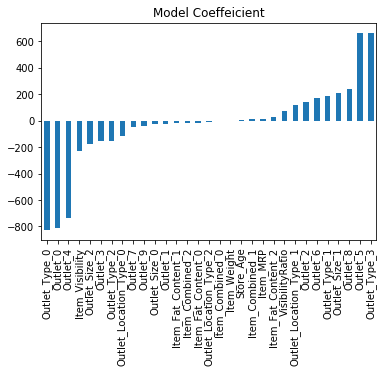

In [358]:
rd = Ridge(alpha = 0.001, normalize = True)
y2 = modelfit(rd, Features, Target, train, test)
coef = pd.Series(rd.coef_[0], Features).sort_values()
coef.plot(kind = 'bar', title = 'Model Coeffeicient')   

The much reduced magnitudes of model coefficients in the graph above suggesting the overfitting has been addressed somehow

### 3. Lasso

In [359]:
alpha = [0.001, 0.01, 0.1, 1]
for i in alpha:
    lasso = Lasso(alpha = i, normalize = True)
    y2 = modelfit(lasso, Features, Target, train, test)

/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarni

CV Score:  1128.77814117
R2 Score:  0.55914121001
CV Score:  1128.73205609
R2 Score:  0.559183245137
CV Score:  1128.68872124
R2 Score:  0.559272711074
CV Score:  1142.68789026
R2 Score:  0.548670784137


From all the results above, Lasso and Ridge didn't improve too much on both of R2 Score and CV Score.

### 4. Decision Tree

firstly to find the optimum depth

CV Score:  1087.99048899
R2 Score:  0.589628371793
CV Score:  1091.31316729
R2 Score:  0.587041197831
CV Score:  1091.4994114
R2 Score:  0.586908299661
CV Score:  1091.4994114
R2 Score:  0.586908299661
CV Score:  1091.4994114
R2 Score:  0.586908299661
CV Score:  1091.4994114
R2 Score:  0.586908299661


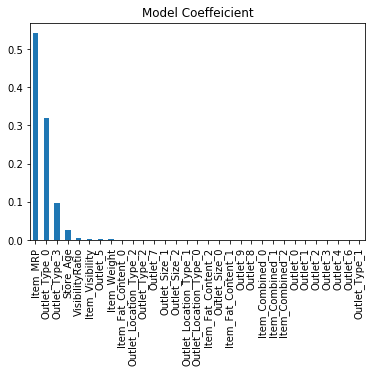

In [360]:
from sklearn.tree import DecisionTreeRegressor
depths = [5,10,20,40,50,70]

for i in depths:
    dtr = DecisionTreeRegressor(max_depth = i, min_samples_leaf = 100)
    y2 = modelfit(dtr, Features, Target, train, test)

coef = pd.Series(dtr.feature_importances_, Features).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Model Coeffeicient')   


secondly to find the optimum min_samples leaf

CV Score:  1088.37739186
R2 Score:  0.589415339987
CV Score:  1088.10696104
R2 Score:  0.589625007747
CV Score:  1088.49048773
R2 Score:  0.58931692468
CV Score:  1087.99048899
R2 Score:  0.589628371793
CV Score:  1097.7043333
R2 Score:  0.582418744045
CV Score:  1092.59168975
R2 Score:  0.586548783613
CV Score:  1105.77500074
R2 Score:  0.576704770659
CV Score:  1116.25855511
R2 Score:  0.568632147783


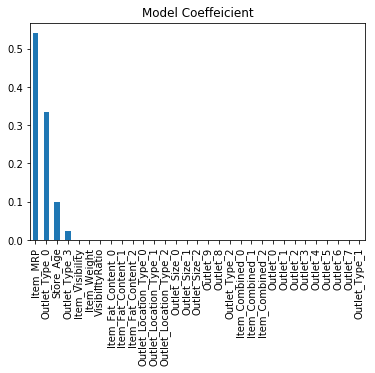

In [361]:
leaves = [20, 50, 80, 100, 150, 200, 250, 300]
for i in leaves:
    dtr = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = i)
    y2 = modelfit(dtr, Features, Target, train, test)

coef = pd.Series(dtr.feature_importances_, Features).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Model Coeffeicient')   



use the max_depth of 5 and min_samples_leaf = 100 to do fitting

CV Score:  1087.99048899
R2 Score:  0.589628371793


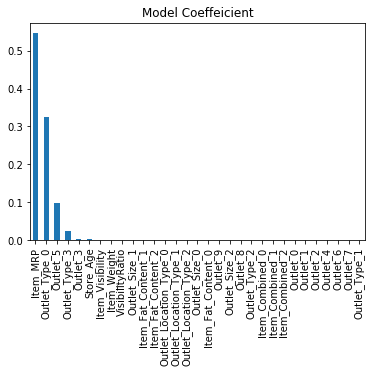

In [362]:
dtr = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 100)
y2 = modelfit(dtr, Features, Target, train, test)

coef = pd.Series(dtr.feature_importances_, Features).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Model Coeffeicient')   

Noticeably, there are only four features that are showing significant importance (Item_MRP, Outlet_Type_0, Outlet_5 and Store_Age). Let's fit the model only using these four features.

CV Score:  1087.6194558
R2 Score:  0.589743894793


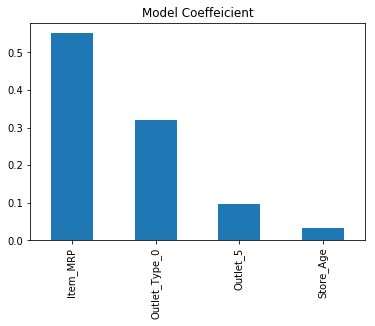

In [363]:
Features1 = ['Item_MRP', 'Outlet_Type_0', 'Outlet_5', 'Store_Age']
dtr = DecisionTreeRegressor(max_depth = 20, min_samples_leaf = 100)
y2 = modelfit(dtr, Features1, Target, train, test)

coef = pd.Series(dtr.feature_importances_, Features1).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Model Coeffeicient')   

### 5. Random Forest

In [371]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 10, min_samples_leaf = 50, n_jobs = 4)
y = modelfit(rfr, Features, Target, train, test)

/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expect

/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/zhichaoweng/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:1675: DataConversionWarning: A co

CV Score:  1080.69403023
R2 Score:  0.595078221662


In [384]:
pred = rfr.predict(train[Features])
from sklearn import metrics
print("RMSE is", np.sqrt(metrics.mean_squared_error(train[Target],pred)))

RMSE is 1039.61271941


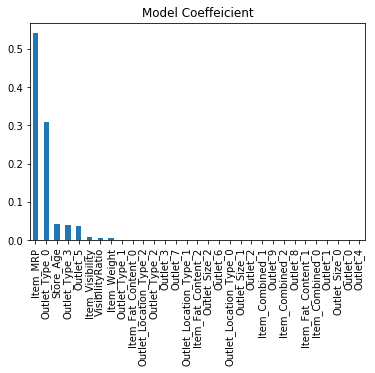

In [372]:
coef = pd.Series(rfr.feature_importances_, Features).sort_values(ascending = False)
coef.plot(kind = 'bar', title = 'Model Coeffeicient')   

Make a plot using the most important feature (Item_MRP) to represent the data prediction

Text(0, 0.5, 'Item_Outlet_Sales')

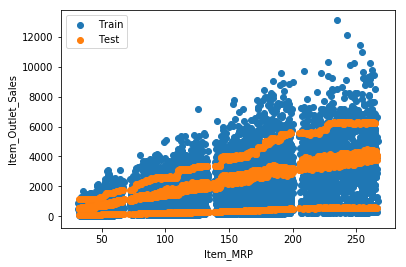

In [392]:
plt.scatter(train['Item_MRP'],train[Target])
plt.scatter(test['Item_MRP'], y)
plt.legend(['Train','Test'])
plt.xlabel('Item_MRP')
plt.ylabel(Target[0])

## Conclusion

using 5 models together (Linear Regression, Ridge, Lasso, Decision Tree and Random Forest), the best regressor is Random Forest, which would give a CV score of 1080 (RMSE is 1039)